In [107]:
from transformers import pipeline

# 显式指定模型和版本（推荐！）
classifier = pipeline(
    task="sentiment-analysis",
    model="distilbert/distilbert-base-uncased-finetuned-sst-2-english",
    revision="714eb0f"  # 指定 Git commit hash（可选）
)

result = classifier("I love Hugging Face!")
print(result)  # 输出: [{'label': 'POSITIVE', 'score': 0.9998}]


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.9998641014099121}]


#2.1数据集

In [108]:
from huggingface_hub import list_datasets

all_datasets = list(list_datasets())  # 用 list() 包裹生成器
print(f"数据集总数: {len(all_datasets)}")
print(f"there are {len(all_datasets)} datasets on the hub")



KeyboardInterrupt: 

## 使用load_dataset()函数加载数据集

In [109]:
from datasets import load_dataset
emotions = load_dataset("emotion")
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

## 使用字典的语法来分割数据

In [111]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

以上代码返回一个dataset类的实例。它类似于普通的python数组或列表，因此我们可以查询长度，或者进行索引访问。

In [112]:
print(len(train_ds))
print(train_ds[3])

16000
{'text': 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'label': 2}


In [113]:
print(train_ds.column_names)
print(train_ds.features)

['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


## 从Datasets到DataFrame
### set_fromat()方法

In [114]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


### 将label中的int换成对应的标注名称，使用int2str()方法

In [115]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)
df["label_name"] = df["label"].apply(label_int2str)
df.head()


,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


# 2.1.3 查看类分布
## 可视化类分布，使用pandas和matplotlib🥲

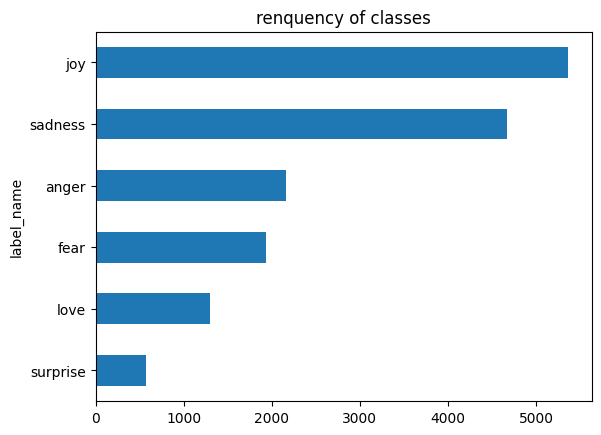

In [116]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("renquency of classes")
plt.show()

## 子词词元化
使用AutoTokenizer类，可以快速加载预训练模型相关的词元分析器，只需调用from_pretrained()方法即可。

In [117]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

我们输入一段文本来检验这个词元分析器是如何工作的。

In [118]:
text = "Tokenizing text is a core task of NLP."
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


通过词元分析器的convert_ids_to_tokens()方法将他们换回词元

In [119]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)
print(tokenizer.convert_tokens_to_string(tokens))

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']
[CLS] tokenizing text is a core task of nlp. [SEP]


In [120]:
###检查词表的大小
print(tokenizer.vocab_size)
###模型上下文的大小
print(tokenizer.model_max_length)

30522
512


#2.2.4对整个数据集进行词元化
使用DatasetDict对象的map()方法对整个语料库进行词元化。首先定义处理函数

In [125]:
# 重置为默认的Arrow格式
emotions.reset_format()

In [126]:
# 修改你的tokenizer调用部分
def tokenize(batch):
    return tokenizer(batch["text"], 
                    padding="max_length",  # 自动填充到最大长度
                    truncation=True,       # 自动截断到最大长度
                    max_length=512,        # 显式设置模型最大长度
                    )

In [127]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

定义好处理函数之后，通过一行代码将该函数应用到语料库整个数据集。batched设置为True表示按批量对推文进行编码;batch_size = None表示将整个数据集作为一个批量。

In [129]:
emotions_encoded = emotions.map(tokenize,batched=True,batch_size=None)

In [130]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


# 2.3训练文本分类器
## 2.3.1使用transformer作为特征提取器

AutoModel具有from_pretrained()方法，可用于加载预训练模型的权重。

In [131]:
from transformers import AutoModel
import torch

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)
print("device is",device)

device is cpu


提取最终隐藏状态,将字符串编码成token，再将token转换为tensor


In [132]:
text = "this is a very suck test"
inputs = tokenizer(text,return_tensors="pt")
print(f"input tensor shape: {inputs['input_ids'].size()}")
inputs


input tensor shape: torch.Size([1, 8])


{'input_ids': tensor([[  101,  2023,  2003,  1037,  2200, 11891,  3231,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

从上面可以看到，tensor的形状为[batch_size, n_tokens]，最后一步是将它们放置在与模型相同的设备上，并按以下方式传入。

In [133]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():#禁用梯度自动计算，减少计算的内存占用
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1165, -0.0300,  0.0867,  ..., -0.1394,  0.1941,  0.4099],
         [-0.1636, -0.3947, -0.0280,  ..., -0.3535,  0.4851,  0.3097],
         [-0.3185, -0.2832,  0.1335,  ..., -0.2396,  0.2296,  0.7341],
         ...,
         [ 0.2058, -0.3295,  0.1869,  ..., -0.0828,  0.1266, -0.3099],
         [ 0.1981, -0.3450, -0.4049,  ..., -0.1551,  0.1298, -0.3955],
         [ 0.8930,  0.1479, -0.4703,  ...,  0.0723, -0.5457, -0.2478]]]), hidden_states=None, attentions=None)


每个隐藏状态的形状[batch_size, n_tokens, hidden_dim]，即每个输入词元都会返回一个768维向量

In [134]:
outputs.last_hidden_state.size()

torch.Size([1, 8, 768])

对于分类任务，通常只使用与[CLS]词元关联的隐藏状态作为输入特征，由于此词元出现在每个序列开头，我们可以通过简单地索引outputs.last_hidden_state来提取。


In [135]:
outputs.last_hidden_state[:, 0].size()

torch.Size([1, 768])

以上是针对单个字符串获取最终的隐藏状态的方法，现在创建一个新的hidden_states来对整个数据集进行相同操作。像在词元分析器中一样，使用Dataset.map()方法来并行化处理数据集。首先是将先前的步骤封装在一个处理函数中。

In [136]:
def extract_hidden_states(batch):
    #place model inputs on the GPU 
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    #extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    #return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

上述函数与之前的逻辑唯一不同的是最后一步，即将last_hidden_state作为Numpy数组放回cpu，因为我们使用batch输入时，map()方法要求处理函数返回python或numpy对象。

由于我们的模型期望输入张量，下面将inputs_ids和attention_mask转换为张量

In [137]:
emotions_encoded.set_format("torch",
                             columns=["input_ids", "attention_mask"])

之后可以一次性提取所有的隐藏状态

In [140]:
emotions_hidden = emotions_encoded.map(extract_hidden_states,batched=True,batch_size=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [141]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

我们得到了每个推文的隐藏状态，下一步是训练一个分类器。为此，需要一个特征矩阵。

## 创建特征矩阵
我们将使用隐藏状态作为输入特征，标注作为目标，创建如下的对应数组

In [155]:
import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((16000, 768), (2000, 768), (16000,), (2000,))

训练之前，进行快速检查以确保提供了我们想要的分类
## 可视化训练集
使用UMAP算法将768维向量空间映射到2维空间。UMAP在特征缩放到[0,1]时效果最佳，所以首先应用MinMaxScaler，然后使用umap-learn库中的UMAP算法进行降维。

In [1]:
import umap
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

#scale fearures to [0,1] range  
x_scale = MinMaxScaler().fit_transform(X_train)
#initialize and fit UMAP 
mapper = UMAP( n_components=2, metric='cosine').fit(x_scale)
#create a new dataframe of 2d embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

ModuleNotFoundError: No module named 'umap'